In [ ]:
##Multiple linear regression attempts to model the relationship between two or more features (TV, Radio, Newspaper)
#and a response(sales)by fitting a linear equation to observed data
#import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import os
print(os.path.abspath('.'))

C:\Users\admin\HCAI-AI


In [ ]:
# get data and read data
data = pd.read_csv("C:/Python/Advertising/Advertising.csv")
print(data.head(10))

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6


In [ ]:
help(data.head)

Help on method head in module pandas.core.generic:

head(n=5) method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    obj_head : same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal':['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3       lion
    4     monkey
    5     parrot
    6      shark
    7      whale
    8      zebra
    
    Viewing the first 5 lines
    


In [ ]:
print(data.shape)
print(data.describe())

(200, 5)
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


No handles with labels found to put in legend.


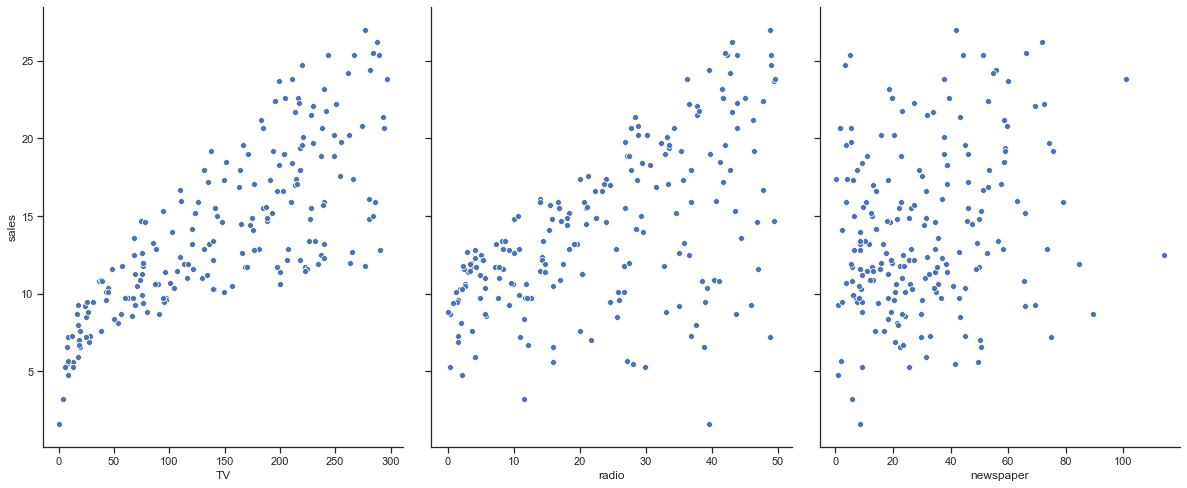

In [ ]:
sns.set(style="ticks", color_codes=True) # change style
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',height =7,aspect=0.8,kind= 'scatter')
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.show()

No handles with labels found to put in legend.


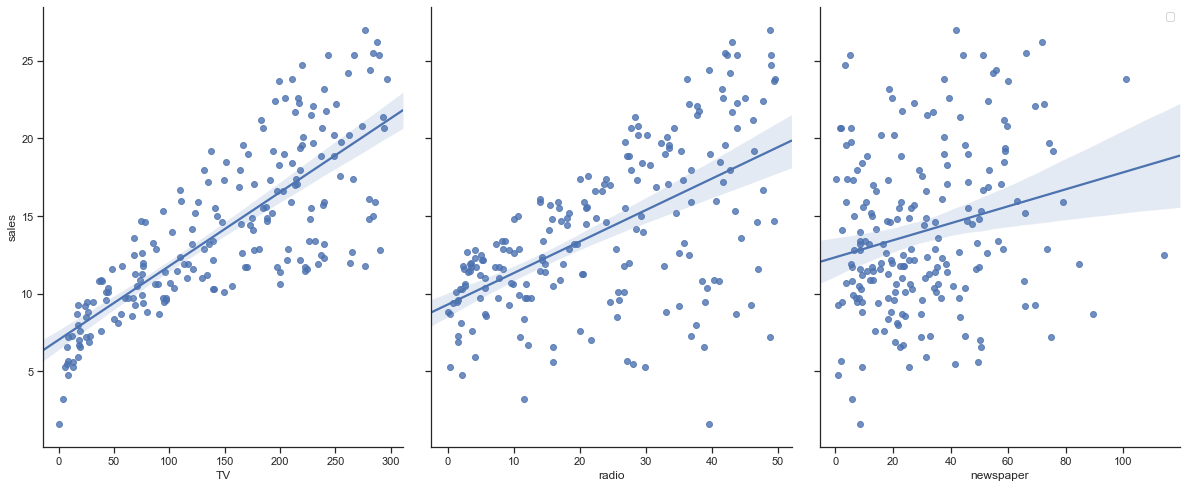

In [ ]:
#A pairplot plot a pairwise relationships in a dataset. 
#The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(data,x_vars=['TV','radio','newspaper'], y_vars='sales',height =7,aspect=0.8,kind='reg')
plt.legend()
plt.show()

In [ ]:
# Build the training data
X = data[['TV', 'radio','newspaper']]
print(X.head())
print(type(X))
print(type(data))
print(X.shape)

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [ ]:
y = data['sales']
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [ ]:
#splite the data into training data and test data
X_train,X_test, y_train, y_test = train_test_split(X, y , random_state=1,train_size = 0.8) 
#random_state=1 set the state of random number, to make the seris of numbers same
print("Training set --> ", X_train.shape) 
print("Training shape --> ", y_train.shape)  
print("Testing set --> ", X_test.shape) 
print("Testing shape --> ", y_test.shape)

Training set -->  (160, 3)
Training shape -->  (160,)
Testing set -->  (40, 3)
Testing shape -->  (40,)


y = w1 * x1 + w2 * x2 + w3 * x3 + b 

In [ ]:
#Build the first linear model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
# print the coefficent of features
print(list(zip(X,linreg.coef_)))  #Coefficients, zip() function creates an iterator that will aggregate elements from two or more iterables.
print(linreg.intercept_) #Intercept

[('TV', 0.04684310317699042), ('radio', 0.17854434380887607), ('newspaper', 0.0025861860939890217)]
2.907947020816433


In [ ]:
#Accuracy score using Explained Variance Score. We define: explained_variance_score = 1 – Var{y – y’}/Var{y}
#where y’ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation.
#The best possible score is 1.0, lower values are worse.
#variance score: 1 means perfect prediction 
print('Variance score: {}'.format(linreg.score(X_test, y_test))) 

Variance score: 0.8927605914615384


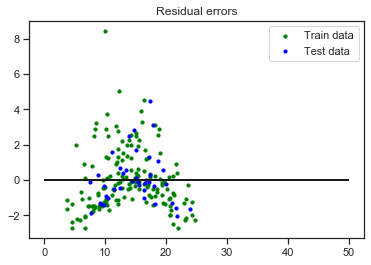

In [ ]:
## Plotting residual errors in training data 
plt.scatter(linreg.predict(X_train), linreg.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data')

## Plotting residual errors in test data 
plt.scatter(linreg.predict(X_test), linreg.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data')

## Plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## Plotting legend 
plt.legend(loc = 'upper right') 

## Plot title 
plt.title("Residual errors") 
  
## Function to show plot 
plt.show() 

In [ ]:
# Prediction with sklearn, use the trainned model to do prediction：
y_pred = linreg.predict(X_test)
print(y_pred)
print(type(y_pred))

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]
<class 'numpy.ndarray'>


In [ ]:
# View the types and length of the y_prediction and y_test
print(type(y_pred),type(y_test))  
print(len(y_pred),len(y_test) )
print(y_pred.shape,y_test.shape )

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
40 40
(40,) (40,)


In [ ]:
# use root-mean-square-error to judge the result
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.4113417558581585


In [ ]:
# define the rmse fuction by yourself
def rmse(a,b):  
    sum_mean=0 
    for i in range(len(a)):
        sum_mean+=(a[i] - b[i])**2
    return (np.sqrt(sum_mean/len(a)))

In [ ]:
#note that we should tranfer the series into arraies
print("RMSE=",rmse(y_pred,np.array(y_test)))

RMSE= 1.4113417558581587


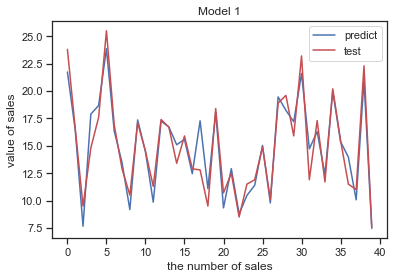

In [ ]:
#plot the prediction and the true value
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right")   
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.title("Model 1")
plt.show() 

In [ ]:
#Train the second model 
#choose the two features which are related with sales
X2 = ['TV', 'radio']  
# select the data of features from the orgin data
X_new = data[X2]  
X_train_new,X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, random_state=1)
linreg = LinearRegression()  
model=linreg.fit(X_train_new, y_train_new)  
print(model)  
print(linreg.coef_ )
print(linreg.intercept_)  
print(list(zip(X2,linreg.coef_)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[0.04660234 0.18117959]
2.9272373202664816
[('TV', 0.04660234071076855), ('radio', 0.18117959203112896)]


In [ ]:
y_pred2= linreg.predict(X_test_new)
print(y_pred2)
print(type(y_pred2))
print("RMSE=",rmse(y_pred2,np.array(y_test_new)))

[21.73751851 16.40451622  7.64073276 17.81512707 18.6140367  23.75320401
 16.26267467 13.30968011  9.11623605 17.24121988 14.37997584  9.86630093
 17.28107008 16.70455883 14.93571851 15.47067849 12.39847009 17.21737409
 11.18626133 18.09114847  9.34543641 12.71804909  8.75327159 10.468843
 11.34116649 14.98646893  9.77329331 19.43186663 18.31005062 17.14215851
 21.62609193 14.47149683 16.3536012  12.27215653 19.97488243 15.34878155
 13.90760851  9.99030388 20.98440888  7.482353    3.61019982  7.1944428
  5.99097416 18.39958364  8.35858094 14.12195436 15.05074527 20.38304162
 20.65191677 19.47457534]
<class 'numpy.ndarray'>
RMSE= 1.3879034699382888


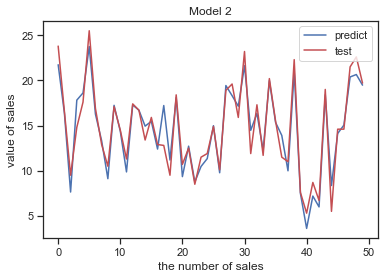

In [ ]:
plt.figure()  
plt.plot(range(len(y_pred2)),y_pred2,'b',label="predict")  
plt.plot(range(len(y_pred2)),y_test_new,'r',label="test")  
plt.legend(loc="upper right") #dispaly the lable  
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')  
plt.title("Model 2")
plt.show() 